In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle 
import re
import datetime
import dateutil
from efunds import EFund
import collections as coll
import statsmodels.api as sm
%matplotlib inline

In [42]:
INDX_raw= pickle.load(open('INDX_raw.p', 'rb'))
INDX= {}
for k,v in INDX_raw.items():
    a= v[v.index>= datetime.datetime(1979,12,1)]
    r= (a- a.shift(1))/a.shift(1)
    INDX[k]= EFund(ret= r, EProdID= k)
# pd.concat([v.value for v in INDX.values()], axis=1).plot(figsize= (10,5))

In [43]:
# # manager data 
# MPerf_raw= {}
# MHolding= {}
# tmp = pd.read_excel('Con Ed - Large Cap US Equity Holdings - 12.31.17_WZ.xlsx', sheet_name='Mgr 1 Returns', index_col=0)
# tmp.iloc[:, 0:3]=tmp.iloc[:, 0:3]/100
# tmp.columns= ['Return', 'RU1000TR', 'ExcessRet', 'MarketValue']
# tmp= tmp.loc[tmp.index<= datetime.datetime(2017, 12,31), :]
# MPerf_raw['A']= tmp

# tmp= pd.read_excel('Con Ed - Large Cap US Equity Holdings - 12.31.17_WZ.xlsx', sheet_name='Mgr 2 Returns', index_col=0)
# tmp.iloc[:, 0:3]=tmp.iloc[:, 0:3]/100
# tmp.columns= ['Return', 'RU1000TR', 'ExcessRet', 'MarketValue']
# tmp= tmp.loc[tmp.index<= datetime.datetime(2017, 12,31), :]
# MPerf_raw['B']= tmp

# tmp= pd.read_excel('Con Ed - Large Cap US Equity Holdings - 12.31.17_WZ.xlsx', sheet_name='Holdings', index_col= 0)
# tmp['Asset ID']= [a[1:] for a in tmp['Asset ID']]
# MHolding['A']= tmp.loc[tmp.index==1, :].reset_index(drop= True)
# MHolding['B']= tmp.loc[tmp.index==2, :].reset_index(drop= True)

# pickle.dump(MPerf_raw, open('MPerf_raw.p', 'wb'))
# pickle.dump(MHolding, open('MHolding.p', 'wb'))

MPerf_raw= pickle.load(open('MPerf_raw.p', 'rb'))
MHolding= pickle.load(open('MHolding.p', 'rb'))

In [44]:
MPerf_RU= {} # Manager performance with RU1k benchemark
MPerf_RUV= {} # Manager performance with RU1kV benchmark
MPerf_RUG= {} # Manager performance with RU1kG Benchmark

for k, v in MPerf_raw.items():
    a= v['Return']
    MPerf_RU[k]= EFund(ret= a, EProdID=k+'_RU1k', benchmark= INDX['RU1000TR'])
    MPerf_RUV[k]= EFund( ret= a, EProdID=k+'_RU1kV', benchmark= INDX['RU1000VTR'])
    MPerf_RUG[k]= EFund( ret= a, EProdID= k+'_RU1kG', benchmark= INDX['RU1000GTR'])

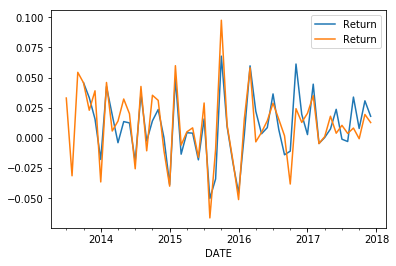

In [45]:
pd.concat([v.validRet for v in MPerf_RU.values()], axis= 1).plot()

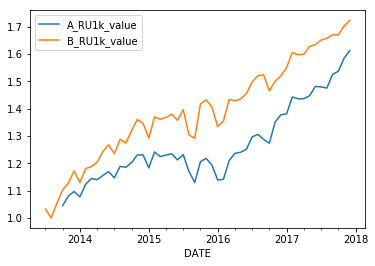

In [46]:
pd.concat([v.value for v in MPerf_RU.values()], axis= 1).plot()

In [47]:
# u= MPerf_RU
# a1=pd.DataFrame(coll.OrderedDict( EProdID= {k:v.EProdID for k, v in u.items()},
#                                  Period= {k: (v.validStart.strftime('%Y%m%d')+ '_'+v.validEnd.strftime('%Y%m%d')) for k,v in u.items()}, 
#                                  Return= {k:v.validAnnualRet for k,v in u.items()},
#                                  Volatility={k:v.volatility for k,v in u.items()},
#                                 SharpR={k:v.SharpeRatio() for k,v in u.items()},
#                                   DownsideRisk= {k:v.DRisk for k,v in u.items()}, 
#                                  MaxDD={k:v.MaxDD[1] for k,v in u.items()},
#                                  BMRet={k:v.bmAnnualRet for k,v in u.items()},
#                                 BMVolatility= {k:v.bmVolatility for k,v in u.items()},
#                                 RMaxDD= {k:v.RMaxDD[1] for k,v in u.items()}, 
#                                 Alpha= {k:v.alpha for k,v in u.items()},
#                                  TE= {k:v.te for k,v in u.items()},
#                                  IR= {k:v.IR for k,v in u.items()}))
# u= MPerf_RUV
# a2=pd.DataFrame(coll.OrderedDict( EProdID= {k:v.EProdID for k, v in u.items()},
#                                  Period= {k: (v.validStart.strftime('%Y%m%d')+ '_'+v.validEnd.strftime('%Y%m%d')) for k,v in u.items()}, 
#                                  Return= {k:v.validAnnualRet for k,v in u.items()},
#                                  Volatility={k:v.volatility for k,v in u.items()},
#                                 SharpR={k:v.SharpeRatio() for k,v in u.items()},
#                                   DownsideRisk= {k:v.DRisk for k,v in u.items()}, 
#                                  MaxDD={k:v.MaxDD[1] for k,v in u.items()},
#                                  BMRet={k:v.bmAnnualRet for k,v in u.items()},
#                                 BMVolatility= {k:v.bmVolatility for k,v in u.items()},
#                                 RMaxDD= {k:v.RMaxDD[1] for k,v in u.items()}, 
#                                 Alpha= {k:v.alpha for k,v in u.items()},
#                                  TE= {k:v.te for k,v in u.items()},
#                                  IR= {k:v.IR for k,v in u.items()}))

# u= MPerf_RUG
# a3=pd.DataFrame(coll.OrderedDict( EProdID= {k:v.EProdID for k, v in u.items()},
#                                  Period= {k: (v.validStart.strftime('%Y%m%d')+ '_'+v.validEnd.strftime('%Y%m%d')) for k,v in u.items()}, 
#                                  Return= {k:v.validAnnualRet for k,v in u.items()},
#                                  Volatility={k:v.volatility for k,v in u.items()},
#                                 SharpR={k:v.SharpeRatio() for k,v in u.items()},
#                                   DownsideRisk= {k:v.DRisk for k,v in u.items()}, 
#                                  MaxDD={k:v.MaxDD[1] for k,v in u.items()},
#                                  BMRet={k:v.bmAnnualRet for k,v in u.items()},
#                                 BMVolatility= {k:v.bmVolatility for k,v in u.items()},
#                                 RMaxDD= {k:v.RMaxDD[1] for k,v in u.items()}, 
#                                 Alpha= {k:v.alpha for k,v in u.items()},
#                                  TE= {k:v.te for k,v in u.items()},
#                                  IR= {k:v.IR for k,v in u.items()}))

# MPerf_Stats= pd.concat([a1, a2, a3], axis=0).set_index(keys= 'EProdID')
# pickle.dump(MPerf_Stats, open('MPerf_Stats.p', 'wb'))
MPerf_Stats= pickle.load(open('MPerf_Stats.p', 'rb'))
MPerf_Stats


Period    Return  Volatility    SharpR  DownsideRisk  \
EProdID                                                                    
A_RU1k   20131031_20171231  0.119064    0.090994  1.308476      0.046655   
B_RU1k   20130731_20171231  0.128656    0.102546  1.254625      0.055841   
A_RU1kV  20131031_20171231  0.119064    0.090994  1.308476      0.046655   
B_RU1kV  20130731_20171231  0.128656    0.102546  1.254625      0.055841   
A_RU1kG  20131031_20171231  0.119064    0.090994  1.308476      0.046655   
B_RU1kG  20130731_20171231  0.128656    0.102546  1.254625      0.055841   

            MaxDD     BMRet  BMVolatility    RMaxDD     Alpha        TE  \
EProdID                                                                   
A_RU1k  -0.089985  0.135730      0.095659 -0.083646 -0.016666  0.034432   
B_RU1k  -0.075264  0.142466      0.097489 -0.118924 -0.013810  0.034629   
A_RU1kV -0.089985  0.117084      0.097321 -0.041039  0.001980  0.026237   
B_RU1kV -0.075264  0.119811      0.099731 -0.095717  0.008845  0.046312   
A_RU1kG -0.089985  0.154184      0.101417 -0.153403 -0.035120  0.056068   
B_RU1kG -0.075264  0.165039      0.102470 -0.145645 -0.036383  0.041533   

               IR  
EProdID            
A_RU1k  -0.484024  
B_RU1k  -0.398795  
A_RU1kV  0.075457  
B_RU1kV  0.190984  
A_RU1kG -0.626384  
B_RU1kG -0.876007

A and B are between Value and Core. A is closer to Value while B is more like a Core manager. Note A holds 40+ stocks while B holds around 20 names. Both A and B hold significant cash. 


In [49]:
# MPerf_Ret= pd.concat([MPerf_RU['A'].validRet, MPerf_RU['B'].validRet, MPerf_RU['B'].benchmarkRet, MPerf_RUV['B'].benchmarkRet, MPerf_RUG['B'].benchmarkRet], axis=1)
# MPerf_Ret.columns= ['Return_A', 'Return_B', 'RU1000TR', 'RU1000VTR', 'RU1000GTR']
# MPerf_Ret['Value_Prem']= MPerf_Ret['RU1000VTR']- MPerf_Ret['RU1000TR']

# pickle.dump(MPerf_Ret, open('MPerf_Ret.p', 'wb'))

MPerf_Ret= pickle.load(open('MPerf_Ret.p', 'rb'))
MPerf_Ret['Growth_Perm']= MPerf_Ret['RU1000GTR']- MPerf_Ret['RU1000TR']
MPerf_Ret.corr()


Return_A  Return_B  RU1000TR  RU1000VTR  RU1000GTR  Value_Prem  \
Return_A     1.000000  0.872057  0.933150   0.963394   0.835563    0.164251   
Return_B     0.872057  1.000000  0.941302   0.895528   0.917919   -0.090210   
RU1000TR     0.933150  0.941302  1.000000   0.962172   0.965262   -0.056255   
RU1000VTR    0.963394  0.895528  0.962172   1.000000   0.857601    0.217884   
RU1000GTR    0.835563  0.917919  0.965262   0.857601   1.000000   -0.315032   
Value_Prem   0.164251 -0.090210 -0.056255   0.217884  -0.315032    1.000000   
Growth_Perm -0.167875  0.085492  0.052999  -0.220921   0.312074   -0.999464   

             Growth_Perm  
Return_A       -0.167875  
Return_B        0.085492  
RU1000TR        0.052999  
RU1000VTR      -0.220921  
RU1000GTR       0.312074  
Value_Prem     -0.999464  
Growth_Perm     1.000000

(0.9, 1.9)

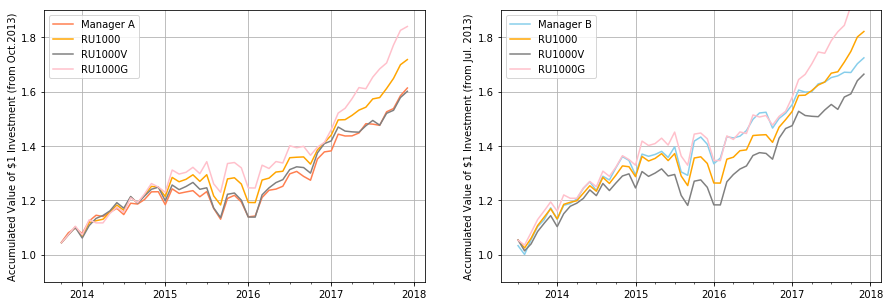

In [51]:
plt.figure(figsize=(15,5))
ax= plt.subplot(121)
v1= pd.concat([MPerf_RUV['A'].value, MPerf_RU['A'].bmValue, MPerf_RUV['A'].bmValue, MPerf_RUG['A'].bmValue], axis=1)
v1.columns= ['Manager A', 'RU1000', 'RU1000V', 'RU1000G']
v1.plot(ax= ax, color= ['coral', 'orange', 'grey','pink'])
ax.grid()
plt.xlabel('')
plt.ylabel('Accumulated Value of $1 Investment (from Oct.2013)')
plt.ylim((0.9,1.9))
# v1.to_excel(writer, sheet_name='Manager A')
# writer.save()
ax=plt.subplot(122)
v2= pd.concat( [MPerf_RU['B'].value, MPerf_RU['B'].bmValue, MPerf_RUV['B'].bmValue, MPerf_RUG['B'].bmValue], axis=1)
v2.columns= ['Manager B', 'RU1000', 'RU1000V', 'RU1000G']
v2.plot(ax= ax, color= ['skyblue', 'orange', 'grey', 'pink'])
plt.grid()
plt.xlabel('')
plt.ylabel('Accumulated Value of $1 Investment (from Jul. 2013)')
plt.ylim((0.9,1.9))

# writer= pd.ExcelWriter('OUTPUT/ManagerValue.xlsx')
# v2.to_excel(writer, sheet_name='Manager B')


### Regression Analysis 


###### Full Sample Regression, OLS


In [10]:
MPerf_FR= {}

# for k, v in MPerf_RU.items():
#     tmp= sm.OLS(endog= v.validRet, exog= sm.add_constant(v.benchmarkRet)).fit()
#     print(k+'_RU1k')
#     print(tmp.summary())
#     MPerf_FR[k+'_RU1k']=tmp
# for k,v in MPerf_RUV.items():
#     tmp=sm.OLS(endog= v.validRet, exog= sm.add_constant(v.benchmarkRet)).fit()
#     print(k+'_RU1kV')
#     print(tmp.summary())
#     MPerf_FR[k+'_RU1kV']=tmp

MPerf_FR['A_RU1k_VP']= sm.OLS(endog= MPerf_Ret['Return_A'], exog= sm.add_constant(MPerf_Ret[['RU1000TR', 'Value_Prem']]), missing= 'drop').fit()
MPerf_FR['A_RU1kV_VP']= sm.OLS(endog= MPerf_Ret['Return_A'], exog= sm.add_constant(MPerf_Ret[['RU1000VTR', 'Value_Prem']]), missing= 'drop').fit()
MPerf_FR['B_RU1k_VP']= sm.OLS(endog= MPerf_Ret['Return_B'], exog= sm.add_constant(MPerf_Ret[['RU1000TR', 'Value_Prem']]), missing= 'drop').fit()
MPerf_FR['B_RU1kV_VP']= sm.OLS(endog= MPerf_Ret['Return_B'], exog= sm.add_constant(MPerf_Ret[['RU1000VTR', 'Value_Prem']]), missing= 'drop').fit()

for k,v in MPerf_FR.items():
    print(k)
    print(v.summary())
    
MPerf_FR['A_RU1kV']= sm.OLS(endog= MPerf_Ret['Return_A'], exog= sm.add_constant(MPerf_Ret['RU1000VTR']), missing= 'drop').fit()
MPerf_FR['A_RU1k']=  sm.OLS(endog= MPerf_Ret['Return_A'], exog= sm.add_constant(MPerf_Ret['RU1000TR']), missing= 'drop').fit()
MPerf_FR['B_RU1k']=  sm.OLS(endog= MPerf_Ret['Return_B'], exog= sm.add_constant(MPerf_Ret['RU1000TR']), missing= 'drop').fit()
MPerf_FR['B_RU1kv']= sm.OLS(endog= MPerf_Ret['Return_B'], exog= sm.add_constant(MPerf_Ret['RU1000VTR']), missing= 'drop').fit()


pickle.dump(MPerf_FR, open('MPerf_FR.p', 'wb'))


B_RU1k_VP
                            OLS Regression Results                            
Dep. Variable:               Return_B   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     201.0
Date:                Wed, 07 Mar 2018   Prob (F-statistic):           6.46e-25
Time:                        10:22:33   Log-Likelihood:                 172.93
No. Observations:                  54   AIC:                            -339.9
Df Residuals:                      51   BIC:                            -333.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0011      0.002     -0.71

In [11]:
u= MPerf_FR['A_RU1k_VP']
u.tvalues

const          0.792958
RU1000TR      24.697858
Value_Prem     6.276110
dtype: float64

In [12]:
MPerf_FR['B_RU1k_VP'].summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Return_B   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     201.0
Date:                Wed, 07 Mar 2018   Prob (F-statistic):           6.46e-25
Time:                        10:22:33   Log-Likelihood:                 172.93
No. Observations:                  54   AIC:                            -339.9
Df Residuals:                      51   BIC:                            -333.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0011      0.002     -0.712      0.480      -0.004       0.002
RU1000TR       0.9879      0.049     19.960      0.000       0.889       1.087
Value_Prem    -0.1408      0.177     -0.794      0.431      -0.497       0.215
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.585
Prob(Omnibus):                  0.965   Jarque-Bera (JB):                0.267
Skew:                           0.011   Prob(JB):                        0.875
Kurtosis:                       2.656   Cond. No.                         129.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The regression result implies that Manager A load significant value style while Manager B does not. 


##### Full Sample Regression: LASSO 

Text(0.5,1,'Params Decay as Penalty Increase')

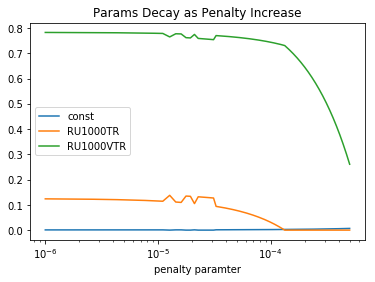

In [13]:
# A
d= pd.concat([MPerf_RU['A'].validRet, MPerf_RU['A'].benchmarkRet, MPerf_RUV['A'].benchmarkRet], axis=1)
y= d['Return']
X= sm.add_constant(d.drop(labels=['Return'], axis=1))

a= np.linspace(1e-6, 0.5e-3, 300)
regs={}
for t in a:
    regs[t]= sm.OLS(endog= y, exog= X ).fit_regularized(alpha= t, L1_wt= 1)

regs_df= pd.DataFrame({k: v.params for k,v in regs.items()}).T
regs_df.plot(logx= True)
plt.xlabel('penalty paramter')
plt.title('Params Decay as Penalty Increase')


Text(0.5,1,'Params Decay as Penalty Increase')

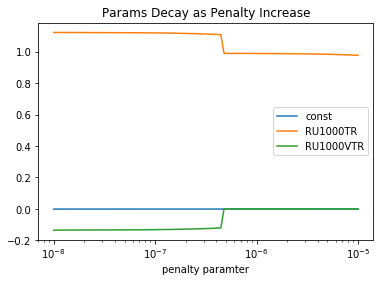

In [14]:
# B
d= pd.concat([MPerf_RU['B'].validRet, MPerf_RU['B'].benchmarkRet, MPerf_RUV['B'].benchmarkRet], axis=1)
y= d['Return']
X= sm.add_constant(d.drop(labels=['Return'], axis=1))

a= np.linspace(1e-8, 1e-5, 300)
regs={}
for t in a:
    regs[t]= sm.OLS(endog= y, exog= X ).fit_regularized(alpha= t, L1_wt= 1)

regs_df= pd.DataFrame({k: v.params for k,v in regs.items()}).T
regs_df.plot(logx= True)
plt.xlabel('penalty paramter')
plt.title('Params Decay as Penalty Increase')


Regularized regression indicates RU1000VTR can better explain Manager A's performance while Manager B is explained by RU1000TR. 

###### Rolling Regression 


Rolling Regression with window 24 months and moving step size 1 month. 



                            OLS Regression Results                            
Dep. Variable:               Return_A   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     314.1
Date:                Wed, 07 Mar 2018   Prob (F-statistic):           2.68e-28
Time:                        11:07:14   Log-Likelihood:                 181.20
No. Observations:                  51   AIC:                            -356.4
Df Residuals:                      48   BIC:                            -350.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.001      0.793      0.4

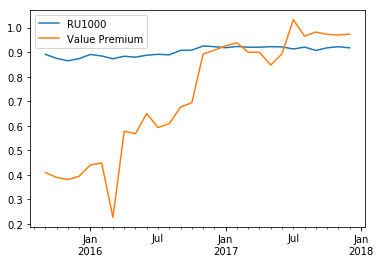

In [37]:
# A

d= sm.add_constant(MPerf_Ret[['Return_A', 'RU1000TR', 'Value_Prem']].dropna(how='any', axis= 0))

rollRegs= {}
window_length= 24
start= d.index[0]
end = start+ dateutil.relativedelta.relativedelta(months= window_length-1, day= 31)
while end<= d.index[-1]: 
    tmp= d.loc[np.logical_and(d.index>= start, d.index<= end),:]
    y= tmp['Return_A']
    X= tmp.drop(labels= ['Return_A'], axis=1)
    # s= start.strftime('%Y%m%d')+'_'+end.strftime('%Y%m%d')
    rollRegs[end]= sm.OLS(endog=y, exog=X).fit()
    
    start= start+ dateutil.relativedelta.relativedelta(months= 1, day= 31)
    end= end+dateutil.relativedelta.relativedelta(months=1, day=31)

rollRegs_df_A= pd.DataFrame({k:v.params for k,v in rollRegs.items()}).T
rollRegs_df_A.columns= ['Const', 'RU1000', 'Value Premium']
# rollRegs_df.plot()

rollRegs_df_A.drop(labels= ['Const'], axis=1).plot()
print(MPerf_FR['A_RU1k_VP'].summary())

Based on the Full-Sample regression result, the CI with 95% confidence level is 0.82-0.97. Rolling regression result falls into this range.

                            OLS Regression Results                            
Dep. Variable:               Return_B   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     404.3
Date:                Wed, 07 Mar 2018   Prob (F-statistic):           3.48e-26
Time:                        11:07:25   Log-Likelihood:                 172.60
No. Observations:                  54   AIC:                            -341.2
Df Residuals:                      52   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0009      0.001     -0.585      0.5

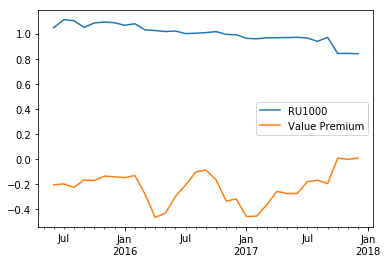

In [38]:
# B

d= sm.add_constant( MPerf_Ret[['Return_B', 'RU1000TR', 'Value_Prem']].dropna(how='any', axis=0))

rollRegs= {}
window_length= 24
start= d.index[0]
end = start+ dateutil.relativedelta.relativedelta(months= window_length-1, day= 31)
while end<= d.index[-1]: 
    tmp= d.loc[np.logical_and(d.index>= start, d.index<= end),:]
    y= tmp['Return_B']
    X= tmp.drop(labels= ['Return_B'], axis=1)
    # s= start.strftime('%Y%m%d')+'_'+end.strftime('%Y%m%d')
    rollRegs[end]= sm.OLS(endog=y, exog=X).fit()
    
    start= start+ dateutil.relativedelta.relativedelta(months= 1, day= 31)
    end= end+dateutil.relativedelta.relativedelta(months=1, day=31)

rollRegs_df_B= pd.DataFrame({k:v.params for k,v in rollRegs.items()}).T
rollRegs_df_B.columns= ['Const', 'RU1000', 'Value Premium']

# rollRegs_df.plot()
rollRegs_df_B.drop(labels=['Const'], axis=1).plot()
print(MPerf_FR['B_RU1k'].summary())

Based on the Full-Sample regression result, the CI with 95% confidence level is 0.89-1.09. 
Rolling regression result drifts. 

(-0.5, 1.2)

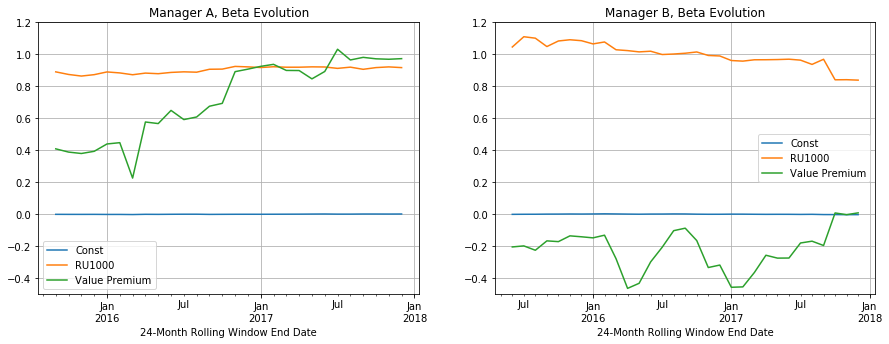

In [40]:
plt.figure(figsize=(15 ,5))
ax= plt.subplot(121)
rollRegs_df_A.plot(ax=ax)
plt.grid()
plt.xlabel('24-Month Rolling Window End Date')
plt.title('Manager A, Beta Evolution')
plt.ylim((-.5, 1.2))
ax= plt.subplot(122)
rollRegs_df_B.plot(ax= ax)
plt.grid()
plt.xlabel('24-Month Rolling Window End Date')
plt.title('Manager B, Beta Evolution')
plt.ylim((-.5, 1.2))


####  Segement Analysis 


Manager behaviors in  bull and bear. 

(38, 3)
(13, 3)


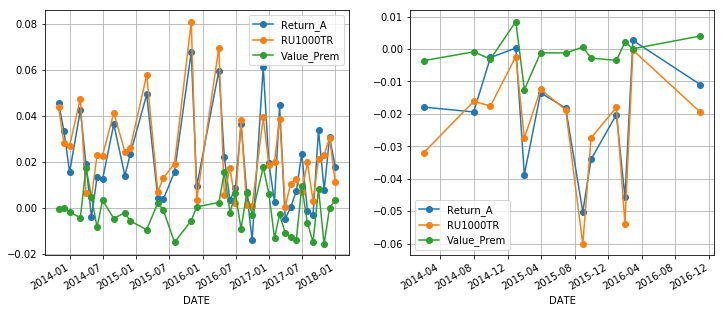

In [18]:
# A, take the benchmark as Value index 

d= MPerf_Ret[['Return_A', 'RU1000TR', 'Value_Prem']].dropna(how='any', axis=0)
d_bull= d.loc[d.RU1000TR> 0, ]
d_bear= d.loc[d.RU1000TR<=0, ]
plt.figure(figsize=(12,5))
ax= plt.subplot(121)
d_bull.plot(ax= ax, marker= 'o')
ax.grid()
ax= plt.subplot(122)
d_bear.plot(ax=ax, marker='o')
ax.grid()
print(d_bull.shape)
print(d_bear.shape)

A does his work- A slightly underperform when benchmark record positive return but outperform when benchmark loses. 

In [19]:
print('A_Bull')
d_bull_reg= sm.OLS(endog= d_bull.Return_A, exog= sm.add_constant(d_bull.drop(labels=['Return_A'], axis=1))).fit()
print(d_bull_reg.summary())
print('A_Bear')
d_bear_reg= sm.OLS(endog= d_bear.Return_A, exog= sm.add_constant(d_bear.drop(labels=['Return_A'], axis=1))).fit()
print(d_bear_reg.summary())
print('A_FullSample')
print(MPerf_FR['A_RU1k_VP'].summary())

A_Bull
                            OLS Regression Results                            
Dep. Variable:               Return_A   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     122.6
Date:                Wed, 07 Mar 2018   Prob (F-statistic):           1.56e-16
Time:                        10:22:44   Log-Likelihood:                 134.63
No. Observations:                  38   AIC:                            -263.3
Df Residuals:                      35   BIC:                            -258.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.002     -0.209  

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


In [20]:
a1= {'Number of Obs': d_bull_reg.nobs, 
    'Beta to Benchmark': d_bull_reg.params['RU1000TR'], 
    'Beta to Value Premium': d_bull_reg.params['Value_Prem'], 
    'Beta to BM_pvalue': d_bull_reg.pvalues['RU1000TR'],
    'Beta to VP_pvalue': d_bull_reg.pvalues['Value_Prem'], 
    'Average BM Montly Ret': d_bull['RU1000TR'].mean(), 
    'Average Manager Monthly Ret': d_bull['Return_A'].mean(), 
    'Average Excess Ret': d_bull['Return_A'].mean()- d_bull['RU1000TR'].mean(),
     'Average Excess Ret Vol': (d_bull['Return_A']- d_bull['RU1000TR']).std(),
    'Average VP Ret': d_bull['Value_Prem'].mean()}
a2= {'Number of Obs': d_bear_reg.nobs, 
    'Beta to Benchmark': d_bear_reg.params['RU1000TR'], 
    'Beta to Value Premium': d_bear_reg.params['Value_Prem'], 
    'Beta to BM_pvalue': d_bear_reg.pvalues['RU1000TR'],
    'Beta to VP_pvalue': d_bear_reg.pvalues['Value_Prem'], 
    'Average BM Montly Ret': d_bear['RU1000TR'].mean(), 
    'Average Manager Monthly Ret': d_bear['Return_A'].mean(), 
    'Average Excess Ret': d_bear['Return_A'].mean()- d_bear['RU1000TR'].mean(),
     'Average Excess Ret Vol': (d_bear['Return_A']- d_bear['RU1000TR']).std(),
    'Average VP Ret': d_bear['Value_Prem'].mean()}

SegementAnalysis= {}
SegementAnalysis['A']= pd.concat([pd.Series(a1, name= 'A_Gain'), pd.Series(a2, name= 'A_Loss')], axis= 1)

Beta in bull market is 0.96 while that in bear market is 0.86 and Beta in full sample is 0.9 with CI (0.82, 0.98). The segement analysis doesn't deviate the full-sample result significantly. Manager A outperform the benchmark as beta shrinkes when benchmark loses. 


Note: The bull and bear sample is not balanced. Bull has 34 obs while Bear has 17 obs.

(40, 3)
(14, 3)


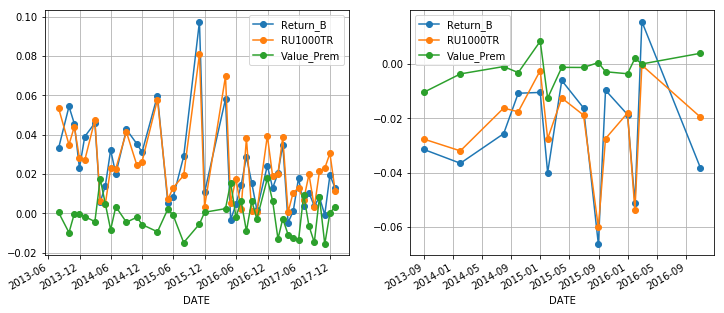

In [21]:
# B, take the benchmark as Core index 

d= MPerf_Ret[['Return_B', 'RU1000TR', 'Value_Prem']].dropna(how='any', axis=0)
d_bull= d.loc[d.RU1000TR> 0, ]
d_bear= d.loc[d.RU1000TR<=0, ]
plt.figure(figsize=(12,5))
ax= plt.subplot(121)
d_bull.plot(ax= ax,marker='o')
ax.grid()
ax= plt.subplot(122)
d_bear.plot(ax=ax, marker='o')
ax.grid()
print(d_bull.shape)
print(d_bear.shape)

In [22]:
print('B_Bull')
d_bull_reg= sm.OLS(endog= d_bull.Return_B, exog= sm.add_constant(d_bull.drop(labels=['Return_B'], axis=1))).fit()
print(d_bull_reg.summary())

print('B_Bear')
d_bear_reg= sm.OLS(endog= d_bear.Return_B, exog= sm.add_constant(d_bear.drop(labels=['Return_B'], axis=1))).fit()
print(d_bear_reg.summary())

print('B_FullSample')
print(MPerf_FR['B_RU1k'].summary())

B_Bull
                            OLS Regression Results                            
Dep. Variable:               Return_B   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     65.97
Date:                Wed, 07 Mar 2018   Prob (F-statistic):           6.30e-13
Time:                        10:22:44   Log-Likelihood:                 128.55
No. Observations:                  40   AIC:                            -251.1
Df Residuals:                      37   BIC:                            -246.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.748e-05      0.003     -0.011  

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


In [23]:
a1= {'Number of Obs': d_bull_reg.nobs, 
    'Beta to Benchmark': d_bull_reg.params['RU1000TR'], 
    'Beta to Value Premium': d_bull_reg.params['Value_Prem'], 
    'Beta to BM_pvalue': d_bull_reg.pvalues['RU1000TR'],
    'Beta to VP_pvalue': d_bull_reg.pvalues['Value_Prem'], 
    'Average BM Montly Ret': d_bull['RU1000TR'].mean(), 
    'Average Manager Monthly Ret': d_bull['Return_B'].mean(), 
    'Average Excess Ret': d_bull['Return_B'].mean()- d_bull['RU1000TR'].mean(),
     'Average Excess Ret Vol': (d_bull['Return_B']-d_bull['RU1000TR']).std(),
    'Average VP Ret': d_bull['Value_Prem'].mean()}
a2= {'Number of Obs': d_bear_reg.nobs, 
    'Beta to Benchmark': d_bear_reg.params['RU1000TR'], 
    'Beta to Value Premium': d_bear_reg.params['Value_Prem'], 
    'Beta to BM_pvalue': d_bear_reg.pvalues['RU1000TR'],
    'Beta to VP_pvalue': d_bear_reg.pvalues['Value_Prem'], 
    'Average BM Montly Ret': d_bear['RU1000TR'].mean(), 
    'Average Manager Monthly Ret': d_bear['Return_B'].mean(), 
    'Average Excess Ret': d_bear['Return_B'].mean()- d_bear['RU1000TR'].mean(),
    'Average Excess Ret Vol': (d_bear['Return_B']-d_bear['RU1000TR']).std(),
    'Average VP Ret': d_bear['Value_Prem'].mean()}

SegementAnalysis['B']= pd.concat([pd.Series(a1, name= 'B_Gain'), pd.Series(a2, name= 'B_Loss')], axis= 1)

In [24]:
pd.concat(list(SegementAnalysis.values()), axis=1)

A_Gain     A_Loss        B_Gain     B_Loss
Average BM Montly Ret        2.285745e-02  -0.023528  2.392403e-02  -0.023818
Average Excess Ret          -2.702979e-03   0.002880 -1.043534e-03  -0.000811
Average Excess Ret Vol       1.024792e-02   0.007917  9.990317e-03   0.010390
Average Manager Monthly Ret  2.015447e-02  -0.020648  2.288050e-02  -0.024629
Average VP Ret              -1.499250e-03  -0.001030 -1.657659e-03  -0.001696
Beta to BM_pvalue            6.292074e-17   0.000042  1.718617e-13   0.000103
Beta to Benchmark            9.527837e-01   0.845807  9.460832e-01   1.101219
Beta to VP_pvalue            8.445544e-07   0.115824  3.880836e-01   0.871779
Beta to Value Premium        8.247747e-01   0.758537 -1.652048e-01  -0.097851
Number of Obs                3.800000e+01  13.000000  4.000000e+01  14.000000

Manager B is complex. 

Manager's downside performance does not outperform benchmark (RU1000TR) consistently. Beta in bull is 0.96 while beta in bear is 1.097 and Beta based on the full sample regression is 1 with CI (0.905 , 1.097). Note bear Beta is at the edge. Manager B has larger beta when benchmark loses. 

Note: The bull and bear sample does not balance. Bull has 40 obs while bear has 14 obs. It may undermine the segement analysis. 

### Peel out the effect of Cash ???



Note: A holds 21m cash which accounts for 5.6% portfolio cost and 4.5% of portfolio value at the end of 2017 Dec, and B holds 1.8m cash which accounts for 0.49% portfolio cost and 0.31% of portfolio value and the end of 2017 Dec. 

### Exposure from Perspective of FF Factors

Is there any significant exposures of FF factors? 

Take the FF 5 factors plus momentum and FF 5 Industries as factor universe. 

In [25]:
FF_6Factor= pickle.load(open('FF_6Factor.p', 'rb'))
FF_5Industry= pickle.load(open('FF_5Industry.p', 'rb'))
FF_5IndustryAlpha= pickle.load(open('FF_5IndustryAlpha.p', 'rb'))
FF_5IndustryBeta= pickle.load(open('FF_5IndustryBeta.p', 'rb'))

In [26]:
pd.concat([FF_6Factor, FF_5IndustryAlpha], axis=1).corr()

Mkt-RF       SMB       HML       RMW       CMA        RF  \
Mkt-RF       1.000000  0.273734 -0.258937 -0.232352 -0.383175 -0.084408   
SMB          0.273734  1.000000 -0.068692 -0.349837 -0.100964 -0.043436   
HML         -0.258937 -0.068692  1.000000  0.065707  0.696096  0.073936   
RMW         -0.232352 -0.349837  0.065707  1.000000 -0.032732  0.002009   
CMA         -0.383175 -0.100964  0.696096 -0.032732  1.000000  0.069021   
RF          -0.084408 -0.043436  0.073936  0.002009  0.069021  1.000000   
MOM         -0.132408 -0.028809 -0.183351  0.111800 -0.021120  0.064349   
Cnsmr_alpha -0.014737  0.123348  0.131236  0.285993  0.140143  0.039758   
Manuf_alpha -0.028897 -0.019175  0.247225  0.180088  0.224907  0.017863   
Hlth_alpha   0.000080 -0.090131 -0.171499  0.027275 -0.004019  0.063666   
HiTec_alpha  0.043593  0.319128 -0.505159 -0.344515 -0.370582 -0.043111   
Other_alpha -0.012689  0.115395  0.516009  0.066573  0.250081  0.018680   

                  MOM  Cnsmr_alpha  Manuf_alpha  Hlth_alpha  HiTec_alpha  \
Mkt-RF      -0.132408    -0.014737    -0.028897    0.000080     0.043593   
SMB         -0.028809     0.123348    -0.019175   -0.090131     0.319128   
HML         -0.183351     0.131236     0.247225   -0.171499    -0.505159   
RMW          0.111800     0.285993     0.180088    0.027275    -0.344515   
CMA         -0.021120     0.140143     0.224907   -0.004019    -0.370582   
RF           0.064349     0.039758     0.017863    0.063666    -0.043111   
MOM          1.000000    -0.126133     0.016692    0.069849     0.092926   
Cnsmr_alpha -0.126133     1.000000    -0.219479    0.111321    -0.192629   
Manuf_alpha  0.016692    -0.219479     1.000000   -0.262439    -0.447806   
Hlth_alpha   0.069849     0.111321    -0.262439    1.000000    -0.168299   
HiTec_alpha  0.092926    -0.192629    -0.447806   -0.168299     1.000000   
Other_alpha -0.249123     0.237837    -0.104619   -0.047574    -0.434641   

             Other_alpha  
Mkt-RF         -0.012689  
SMB             0.115395  
HML             0.516009  
RMW             0.066573  
CMA             0.250081  
RF              0.018680  
MOM            -0.249123  
Cnsmr_alpha     0.237837  
Manuf_alpha    -0.104619  
Hlth_alpha     -0.047574  
HiTec_alpha    -0.434641  
Other_alpha     1.000000

In [27]:
FF_5IndustryExcessRet= FF_5Industry.copy(deep=True)
for c in FF_5IndustryExcessRet.columns:
    FF_5IndustryExcessRet[c]= FF_5IndustryExcessRet[c]- FF_6Factor['Mkt-RF']

    

In [28]:
pd.concat([FF_6Factor, FF_5IndustryExcessRet], axis=1).corr()

Mkt-RF       SMB       HML       RMW       CMA        RF       MOM  \
Mkt-RF  1.000000  0.273734 -0.258937 -0.232352 -0.383175 -0.084408 -0.132408   
SMB     0.273734  1.000000 -0.068692 -0.349837 -0.100964 -0.043436 -0.028809   
HML    -0.258937 -0.068692  1.000000  0.065707  0.696096  0.073936 -0.183351   
RMW    -0.232352 -0.349837  0.065707  1.000000 -0.032732  0.002009  0.111800   
CMA    -0.383175 -0.100964  0.696096 -0.032732  1.000000  0.069021 -0.021120   
RF     -0.084408 -0.043436  0.073936  0.002009  0.069021  1.000000  0.064349   
MOM    -0.132408 -0.028809 -0.183351  0.111800 -0.021120  0.064349  1.000000   
Cnsmr  -0.181191  0.002623  0.220379  0.461249  0.207620  0.161977 -0.084603   
Manuf  -0.284960 -0.202975  0.367727  0.310728  0.376327  0.149878  0.076778   
HiTec   0.165428  0.091860 -0.433782 -0.368569 -0.385472  0.064001 -0.063528   
Hlth   -0.228199 -0.252585 -0.172358  0.286507  0.004362  0.135601  0.169293   
Other   0.218791  0.150693  0.447828  0.092190  0.141195  0.146816 -0.229417   

           Cnsmr     Manuf     HiTec      Hlth     Other  
Mkt-RF -0.181191 -0.284960  0.165428 -0.228199  0.218791  
SMB     0.002623 -0.202975  0.091860 -0.252585  0.150693  
HML     0.220379  0.367727 -0.433782 -0.172358  0.447828  
RMW     0.461249  0.310728 -0.368569  0.286507  0.092190  
CMA     0.207620  0.376327 -0.385472  0.004362  0.141195  
RF      0.161977  0.149878  0.064001  0.135601  0.146816  
MOM    -0.084603  0.076778 -0.063528  0.169293 -0.229417  
Cnsmr   1.000000 -0.055527 -0.349909  0.166353  0.185336  
Manuf  -0.055527  1.000000 -0.516039 -0.055356 -0.031446  
HiTec  -0.349909 -0.516039  1.000000 -0.216615 -0.420478  
Hlth    0.166353 -0.055356 -0.216615  1.000000 -0.039478  
Other   0.185336 -0.031446 -0.420478 -0.039478  1.000000

##### FF 6 Factor Exposure


                            OLS Regression Results                            
Dep. Variable:               Return_A   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     75.57
Date:                Wed, 07 Mar 2018   Prob (F-statistic):           4.46e-22
Time:                        10:22:45   Log-Likelihood:                 179.74
No. Observations:                  51   AIC:                            -343.5
Df Residuals:                      43   BIC:                            -328.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.001      0.350      0.7

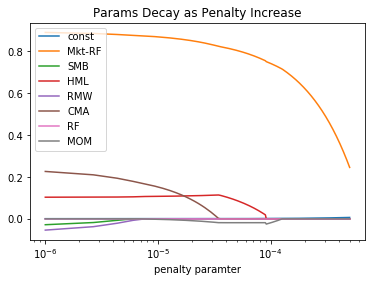

In [29]:
# A 

# A_alpha= MPerf_Ret['Return_A']- MPerf_Ret['RU1000VTR']
# A_alpha.name= 'A_alpha'
d= pd.concat([MPerf_Ret['Return_A'],  FF_6Factor], axis=1)


y= d['Return_A']
X= sm.add_constant(d.drop(labels=['Return_A'], axis=1))

reg= sm.OLS(endog= y, exog= X, missing='drop').fit()
print(reg.summary())

a= np.linspace(1e-6, 0.5e-3, 300)
regs={}
for t in a:
    regs[t]= sm.OLS(endog= y, exog= X, missing= 'drop' ).fit_regularized(alpha= t, L1_wt= 1)

regs_df= pd.DataFrame({k: v.params for k,v in regs.items()}).T
regs_df.plot(logx= True)
plt.xlabel('penalty paramter')
plt.title('Params Decay as Penalty Increase')

MPerf_6F= {}
MPerf_6F['A']= sm.OLS(endog= y, exog= X[['const', 'HML', 'Mkt-RF']], missing= 'drop').fit()
print(MPerf_6F['A'].summary())

                            OLS Regression Results                            
Dep. Variable:               Return_B   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     64.26
Date:                Wed, 07 Mar 2018   Prob (F-statistic):           1.29e-21
Time:                        10:22:49   Log-Likelihood:                 178.15
No. Observations:                  54   AIC:                            -340.3
Df Residuals:                      46   BIC:                            -324.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0013      0.002      0.793      0.4

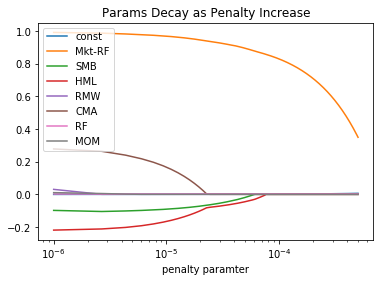

In [30]:
# B

# B_alpha= MPerf_Ret['Return_B']- MPerf_Ret['RU1000TR']
# B_alpha.name= 'B_alpha'
d= pd.concat([MPerf_Ret['Return_B'], FF_6Factor], axis=1)

y= d['Return_B']
X= sm.add_constant(d.drop(labels=['Return_B'], axis=1))

reg= sm.OLS(endog= y, exog= X, missing='drop').fit()
print(reg.summary())

a= np.linspace(1e-6, 0.5e-3, 300)
regs={}
for t in a:
    regs[t]= sm.OLS(endog= y, exog= X, missing= 'drop' ).fit_regularized(alpha= t, L1_wt= 1)

regs_df= pd.DataFrame({k: v.params for k,v in regs.items()}).T
regs_df.plot(logx= True)
plt.xlabel('penalty paramter')
plt.title('Params Decay as Penalty Increase')

MPerf_6F['B']= sm.OLS(endog= y, exog= X[['const', 'HML', 'Mkt-RF']], missing= 'drop').fit()
print(MPerf_6F['B'].summary())

##### FF Industry Bets

                            OLS Regression Results                            
Dep. Variable:               Return_A   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     131.5
Date:                Wed, 07 Mar 2018   Prob (F-statistic):           1.98e-26
Time:                        10:22:52   Log-Likelihood:                 188.74
No. Observations:                  51   AIC:                            -363.5
Df Residuals:                      44   BIC:                            -350.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.001     -0.150      0.8

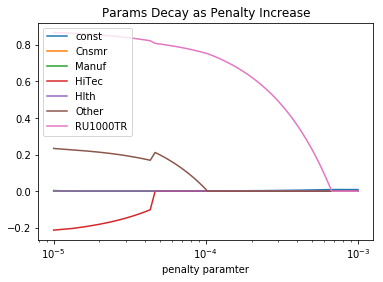

In [31]:
# A 

# A_alpha= MPerf_Ret['Return_A']- MPerf_Ret['RU1000VTR']
# A_alpha.name= 'A_alpha'
d= pd.concat([MPerf_Ret['Return_A'],  FF_5IndustryExcessRet, MPerf_Ret['RU1000TR']], axis=1)


y= d['Return_A']
X= sm.add_constant(d.drop(labels=['Return_A'], axis=1))

reg= sm.OLS(endog= y, exog= X, missing='drop').fit()
print(reg.summary())

a= np.linspace(1e-5, 1e-3, 300)
regs={}
for t in a:
    regs[t]= sm.OLS(endog= y, exog= X, missing= 'drop' ).fit_regularized(alpha= t, L1_wt= 1)

regs_df= pd.DataFrame({k: v.params for k,v in regs.items()}).T
regs_df.plot(logx= True)
plt.xlabel('penalty paramter')
plt.title('Params Decay as Penalty Increase')

MPerf_Ind= {}
MPerf_Ind['A']= sm.OLS(endog= y, exog= X[['const','Other' , 'RU1000TR']], missing= 'drop').fit()
print(MPerf_Ind['A'].summary())

                            OLS Regression Results                            
Dep. Variable:               Return_B   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     65.75
Date:                Wed, 07 Mar 2018   Prob (F-statistic):           3.47e-21
Time:                        10:22:54   Log-Likelihood:                 174.44
No. Observations:                  54   AIC:                            -334.9
Df Residuals:                      47   BIC:                            -321.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.002     -0.790      0.4

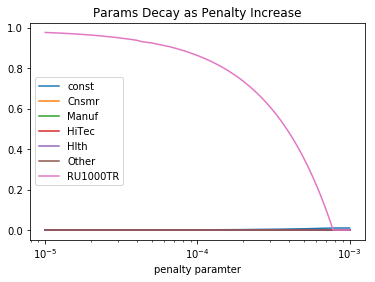

In [32]:
# B

d= pd.concat([MPerf_Ret['Return_B'],  FF_5IndustryExcessRet, MPerf_Ret['RU1000TR']], axis=1)


y= d['Return_B']
X= sm.add_constant(d.drop(labels=['Return_B'], axis=1))

reg= sm.OLS(endog= y, exog= X, missing='drop').fit()
print(reg.summary())

a= np.linspace(1e-5, 1e-3, 300)
regs={}
for t in a:
    regs[t]= sm.OLS(endog= y, exog= X, missing= 'drop' ).fit_regularized(alpha= t, L1_wt= 1)

regs_df= pd.DataFrame({k: v.params for k,v in regs.items()}).T
regs_df.plot(logx= True)
plt.xlabel('penalty paramter')
plt.title('Params Decay as Penalty Increase')

MPerf_Ind['B']= sm.OLS(endog= y, exog= X[['const', 'RU1000TR']], missing= 'drop').fit()
print(MPerf_Ind['B'].summary())


##### Is the factor loading stable? 

##### 1. FF  HML factor loading

                            OLS Regression Results                            
Dep. Variable:               Return_A   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     260.9
Date:                Wed, 07 Mar 2018   Prob (F-statistic):           1.64e-26
Time:                        10:22:57   Log-Likelihood:                 176.83
No. Observations:                  51   AIC:                            -347.7
Df Residuals:                      48   BIC:                            -341.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.001      0.366      0.7

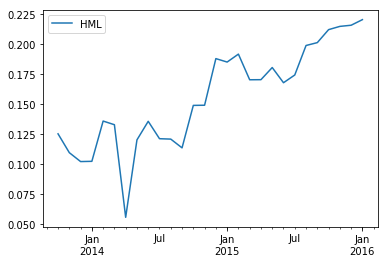

In [33]:
# A

d= sm.add_constant(pd.concat([MPerf_Ret['Return_A'],  FF_6Factor[['Mkt-RF', 'HML']]], axis=1)).dropna(how='any', axis=0)

rollRegs= {}
window_length= 24
start= d.index[0]
end = start+ dateutil.relativedelta.relativedelta(months= window_length-1, day= 31)
while end<= d.index[-1]: 
    tmp= d.loc[np.logical_and(d.index>= start, d.index<= end),:]
    y= tmp['Return_A']
    X= tmp.drop(labels= ['Return_A'], axis=1)
    # s= start.strftime('%Y%m%d')+'_'+end.strftime('%Y%m%d')
    rollRegs[start]= sm.OLS(endog=y, exog=X).fit()
    
    start= start+ dateutil.relativedelta.relativedelta(months= 1, day= 31)
    end= end+dateutil.relativedelta.relativedelta(months=1, day=31)

rollRegs_df= pd.DataFrame({k:v.params for k,v in rollRegs.items()}).T
# rollRegs_df.plot()

rollRegs_df.drop(labels= ['const', 'Mkt-RF'], axis=1).plot()

print(MPerf_6F['A'].summary())

                            OLS Regression Results                            
Dep. Variable:               Return_B   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     181.8
Date:                Wed, 07 Mar 2018   Prob (F-statistic):           6.19e-24
Time:                        10:22:57   Log-Likelihood:                 170.54
No. Observations:                  54   AIC:                            -335.1
Df Residuals:                      51   BIC:                            -329.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.002     -0.337      0.7

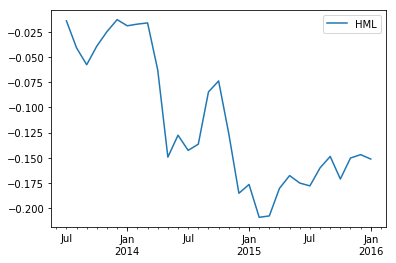

In [34]:
# B

d= sm.add_constant(pd.concat([MPerf_Ret['Return_B'],  FF_6Factor[['Mkt-RF', 'HML']]], axis=1)).dropna(how='any', axis=0)

rollRegs= {}
window_length= 24
start= d.index[0]
end = start+ dateutil.relativedelta.relativedelta(months= window_length-1, day= 31)
while end<= d.index[-1]: 
    tmp= d.loc[np.logical_and(d.index>= start, d.index<= end),:]
    y= tmp['Return_B']
    X= tmp.drop(labels= ['Return_B'], axis=1)
    # s= start.strftime('%Y%m%d')+'_'+end.strftime('%Y%m%d')
    rollRegs[start]= sm.OLS(endog=y, exog=X).fit()
    
    start= start+ dateutil.relativedelta.relativedelta(months= 1, day= 31)
    end= end+dateutil.relativedelta.relativedelta(months=1, day=31)

rollRegs_df= pd.DataFrame({k:v.params for k,v in rollRegs.items()}).T
# rollRegs_df.plot()

rollRegs_df.drop(labels= ['const', 'Mkt-RF'], axis=1).plot()

print(MPerf_6F['B'].summary())

##### 2. FF  Industry bet

                            OLS Regression Results                            
Dep. Variable:               Return_A   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     293.4
Date:                Wed, 07 Mar 2018   Prob (F-statistic):           1.22e-27
Time:                        10:22:58   Log-Likelihood:                 179.59
No. Observations:                  51   AIC:                            -353.2
Df Residuals:                      48   BIC:                            -347.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.001     -0.207      0.8

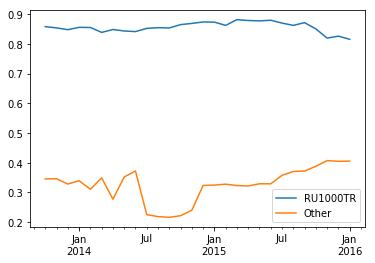

In [35]:
# A

d= sm.add_constant(pd.concat([MPerf_Ret[['Return_A', 'RU1000TR']],FF_5IndustryExcessRet['Other']]  , axis=1)).dropna(how='any', axis=0)

rollRegs= {}
window_length= 24
start= d.index[0]
end = start+ dateutil.relativedelta.relativedelta(months= window_length-1, day= 31)
while end<= d.index[-1]: 
    tmp= d.loc[np.logical_and(d.index>= start, d.index<= end),:]
    y= tmp['Return_A']
    X= tmp.drop(labels= ['Return_A'], axis=1)
    # s= start.strftime('%Y%m%d')+'_'+end.strftime('%Y%m%d')
    rollRegs[start]= sm.OLS(endog=y, exog=X).fit()
    
    start= start+ dateutil.relativedelta.relativedelta(months= 1, day= 31)
    end= end+dateutil.relativedelta.relativedelta(months=1, day=31)

rollRegs_df= pd.DataFrame({k:v.params for k,v in rollRegs.items()}).T
# rollRegs_df.plot()

rollRegs_df.drop(labels= ['const'], axis=1).plot()

print(MPerf_Ind['A'].summary())

                            OLS Regression Results                            
Dep. Variable:               Return_B   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     404.3
Date:                Wed, 07 Mar 2018   Prob (F-statistic):           3.48e-26
Time:                        10:22:58   Log-Likelihood:                 172.60
No. Observations:                  54   AIC:                            -341.2
Df Residuals:                      52   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0009      0.001     -0.585      0.5

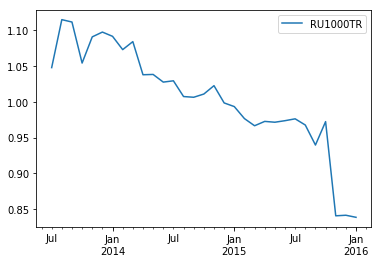

In [36]:
# B

d= sm.add_constant(pd.concat([MPerf_Ret[['Return_B', 'RU1000TR']]], axis=1)).dropna(how='any', axis=0)

rollRegs= {}
window_length= 24
start= d.index[0]
end = start+ dateutil.relativedelta.relativedelta(months= window_length-1, day= 31)
while end<= d.index[-1]: 
    tmp= d.loc[np.logical_and(d.index>= start, d.index<= end),:]
    y= tmp['Return_B']
    X= tmp.drop(labels= ['Return_B'], axis=1)
    # s= start.strftime('%Y%m%d')+'_'+end.strftime('%Y%m%d')
    rollRegs[start]= sm.OLS(endog=y, exog=X).fit()
    
    start= start+ dateutil.relativedelta.relativedelta(months= 1, day= 31)
    end= end+dateutil.relativedelta.relativedelta(months=1, day=31)

rollRegs_df= pd.DataFrame({k:v.params for k,v in rollRegs.items()}).T
# rollRegs_df.plot()

rollRegs_df.drop(labels= ['const'], axis=1).plot()

print(MPerf_Ind['B'].summary())

Managers deviates at the loading of FF HML(Value) factor. Manager A shows significant positive loading while B has negative loading. It implies at least B is less value-focused compared to A. Rolling analysis shows some drift but the results still fall into the 95% CI of full sample regression.


From perspective of FF industry/sector, while both managers load over Health and Manufactury, manager A shows sector bias over industies which are classified as Other by FF, and manager B loads HiTec. Rolling regression implies sector betting shift. Manager A is shifting from Other to Manuf while it is not sever. Manager B is shifting awary from HiTec as record grows. The bet over Hlth is quite stable. 